# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (50,25)
Number of data: 1250.0
dx: 244.9 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_multi['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -20.0 degree
Main field declination: -20.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_multi['m_R']
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Intensity: 15.0 A/m
Inclination: -45.0 degree
Declination: 30.0 degree


In [16]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer with my function 

In [17]:
h = 1150.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e2,1e3,1e4,1e5,5*1e5,1e6,1e7]

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-20.6541189979 -10.9017889524
i = 1
-27.8666056505 -10.1532509376
i = 2
-32.7706691648 -9.14810175076
i = 3
-36.6493347171 -8.02507093595
i = 4
-39.8016273337 -6.76690512648
i = 5
-42.4070310211 -5.23884187415
i = 6
-44.5396078155 -3.45566089375
i = 7
-46.296453792 -1.44917869066
i = 8
-47.7437825822 0.731800825738
i = 9
-48.9265667335 3.02716471766
i = 10
-49.8693488999 5.37680013086
i = 11
-50.6002960002 7.72134369361
i = 12
-51.1455287155 9.99345569625
i = 13
-51.5334063353 12.1577064284
i = 14
-51.8006506485 14.1706597251
i = 15
-51.9763371909 16.0114871625
i = 16
-52.0860705011 17.6734179742
i = 17
-52.1481476208 19.1575471685
i = 18
-52.1778565796 20.4653839938
i = 19
-52.1880978912 21.6030429996
i = 20
-52.171814351 22.6691094058
i = 21
-52.1334034167 23.6686018287
i = 22
-52.0762191705 24.6149561928
i = 23
-52.0021497922 25.5124322703
i = 24
-51.9100743315 26.3660894788
i = 25
-51.8026075237 27.1796388396
i = 26
-51.6828920861 27.9542882313
i = 27
-51.554772113 28.6891428

-51.7365766711 27.9066387971
i = 27
-51.6131307757 28.6320972993
i = 28
-51.4822223743 29.3230990339
i = 29
-51.346603224 29.9755819508
i = 30
-51.2074809272 30.5912389369
i = 31
-51.0659311917 31.1709040374
i = 32
-50.9231811415 31.715675128
i = 33
-50.7800608195 32.227527121
i = 34
-50.6371879167 32.7087378015
i = 35
-50.4951649386 33.1618973606
i = 36
-50.3545346367 33.5886679599
i = 37
-50.2155951728 33.9909485752
i = 38
-50.0762050713 34.3735111886
i = 39
-49.9369116185 34.7351242242
i = 40
-49.8000997832 35.0723017723
i = 41
-49.6661681483 35.3867107351
i = 42
-49.5344355504 35.6829540044
i = 43
-49.4037983375 35.9654734717
i = 44
-49.2745064755 36.2349638298
i = 45
-49.1466033755 36.4913698058
i = 46
-49.0200065345 36.734330952
i = 47
-48.8948418567 36.96463229
i = 48
-48.7717651805 37.1821254626
i = 49
-48.6509717891 37.3876579836
i = 50
-48.5326053578 37.5819863067
i = 51
-48.4167799868 37.7658149392
i = 52
-48.3035828628 37.9398001114
i = 53
-48.1930807066 38.1045523259
i = 5

## L-curve visualization

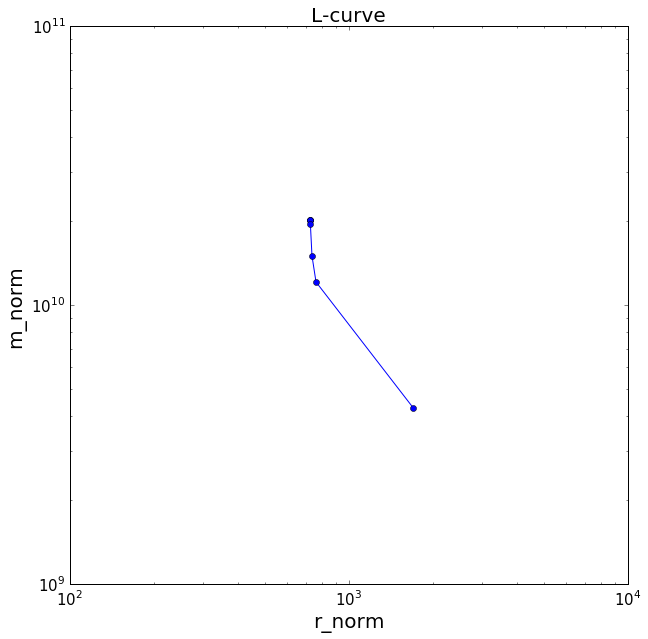

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
